<a href="https://colab.research.google.com/github/israelfmsantana/Trabalho-02---Redes-Neurais/blob/main/Projeto_2_Inteligencia_Artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a) Faça as análises e alterações necessárias na base de dados para predizer a variável Severity
Level. Verifique se a base de dados possui valores faltantes ou outliers. Caso existam, explique
as considerações e mudanças propostas.

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature  

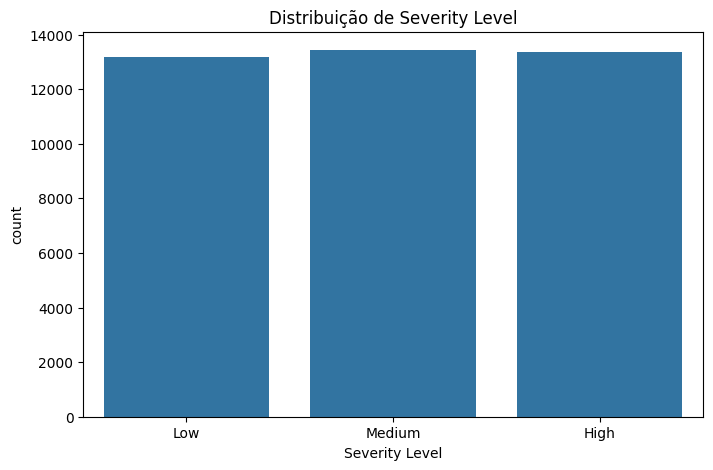


Tipos das colunas:
Timestamp                  object
Source IP Address          object
Destination IP Address     object
Source Port                 int64
Destination Port            int64
Protocol                   object
Packet Length               int64
Packet Type                object
Traffic Type               object
Payload Data               object
Malware Indicators         object
Anomaly Scores            float64
Alerts/Warnings            object
Attack Type                object
Attack Signature           object
Action Taken               object
Severity Level             object
User Information           object
Device Information         object
Network Segment            object
Geo-location Data          object
Proxy Information          object
Firewall Logs              object
IDS/IPS Alerts             object
Log Source                 object
dtype: object

Colunas numéricas consideradas para o heatmap de correlação:
Index(['Source Port', 'Destination Port', 'Packet Leng

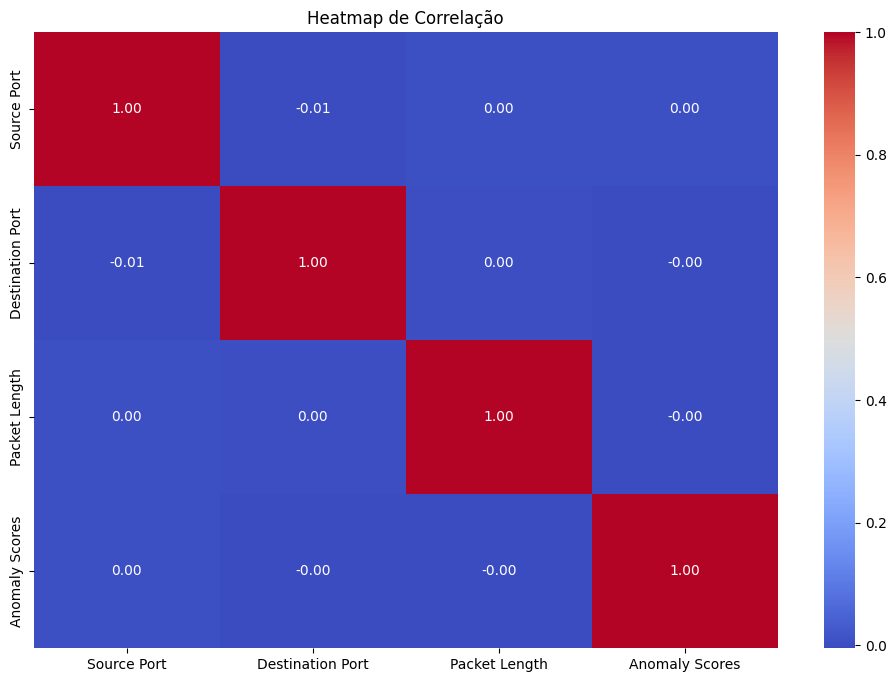

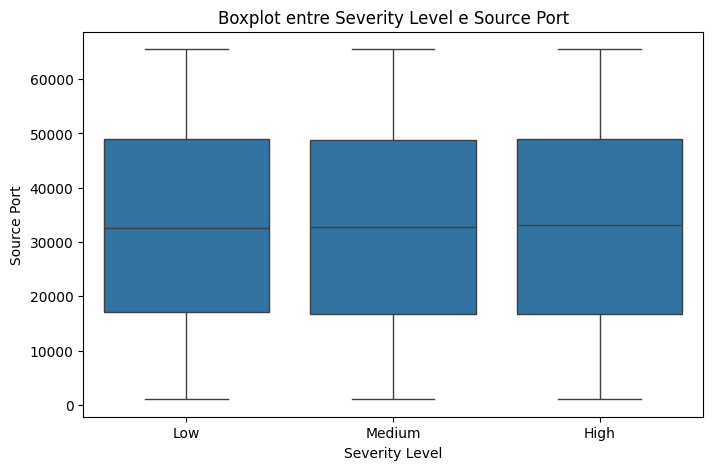

Acurácia: 0.328625

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.33      0.37      0.35      2598
           1       0.33      0.31      0.32      2673
           2       0.33      0.30      0.31      2729

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Melhores Parâmetros: {'n_estimators': 100, 'max_depth': 20}
Melhor Acurácia durante a validação cruzada: 0.3393124908968102

Acurácia do Modelo Otimizado: 0.335375

Relatório de Classificação do Modelo Otimizado:
              precision    recall  f1-score   support

           0       0.32      0.37      0.34      2598
           1       0.34      0.29      0.31      2673
           2       0.35      0.35      0.35      2729

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.33      8000
weighted avg       0.34      0.34      0.33      8000



In [6]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Carregar a base de dados
file_path = '/content/cybersecurity_attacks.csv'
df = pd.read_csv(file_path)

# 2. Inspecionar e limpar os dados
print("Informações gerais:")
print(df.info())

# Remover duplicatas
df = df.drop_duplicates()

# Verificar valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

# Preencher ou tratar valores ausentes
df.fillna(df.median(numeric_only=True), inplace=True)

# Resumo estatístico
print("\nResumo estatístico:")
print(df.describe())

# 3. Analisar a variável Severity Level
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Severity Level')
plt.title('Distribuição de Severity Level')
plt.show()

# 4. Análise exploratória de dados (EDA)
# Verificar os tipos das colunas
print("\nTipos das colunas:")
print(df.dtypes)

# Identificar colunas numéricas para análise de correlação
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("\nColunas numéricas consideradas para o heatmap de correlação:")
print(num_cols)

# Heatmap de correlação apenas com colunas numéricas
plt.figure(figsize=(12, 8))
corr = df[num_cols].corr()  # Considerar apenas colunas numéricas
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Heatmap de Correlação')
plt.show()

# Boxplot para uma métrica específica
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Severity Level', y=num_cols[0])
plt.title(f'Boxplot entre Severity Level e {num_cols[0]}')
plt.show()

# 5. Pré-processamento dos dados
# Normalizar variáveis numéricas
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Codificar variáveis categóricas
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# 6. Divisão dos dados em treino e teste
X = df.drop('Severity Level', axis=1)
y = df['Severity Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Treinamento e avaliação do modelo inicial
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred))

# 8. Otimização do modelo com RandomizedSearchCV
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None]
}

# Usando RandomizedSearchCV para otimizar o tempo
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

print("\nMelhores Parâmetros:", random_search.best_params_)
print("Melhor Acurácia durante a validação cruzada:", random_search.best_score_)

# Treinamento com os melhores parâmetros
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# Avaliação do modelo otimizado
y_pred_optimized = best_model.predict(X_test)
print("\nAcurácia do Modelo Otimizado:", accuracy_score(y_test, y_pred_optimized))
print("\nRelatório de Classificação do Modelo Otimizado:")
print(classification_report(y_test, y_pred_optimized))


In [7]:
# Verificar valores faltantes e outliers

# 1. Verificar valores faltantes
print("\nValores faltantes por coluna:")
print(df.isnull().sum())

# 2. Analisar outliers
# Vamos usar o método do IQR (Interquartile Range) para detectar outliers
Q1 = df.describe().loc['25%']
Q3 = df.describe().loc['75%']
IQR = Q3 - Q1

print("\nDetecção de Outliers utilizando o método IQR:")

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    num_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

    if num_outliers > 0:
        print(f"{col}: {num_outliers} outliers detectados")
    else:
        print(f"{col}: Nenhum outlier detectado")



Valores faltantes por coluna:
Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

Detecção de Outliers utilizando o método IQR:
Timestamp: Nenhum outlier detectado
Source IP Address: Nenhum outlier detectado
Destination IP Address: Nenhum outlier detectado
Source Port: Nenhum outlier detectado
Destination Port: Nenhum outlier detectado

b) Faça um HeatMap correlacionando o número de ataques em cada dia da semana e a cada
ano. Explique os resultados obtidos.

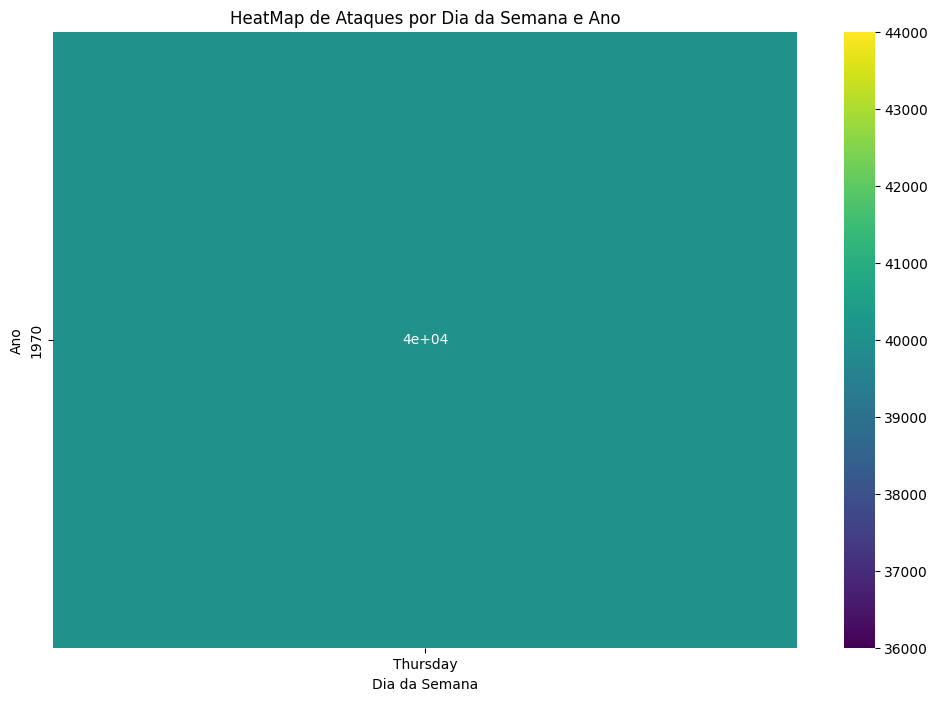

In [8]:
# Próxima célula: HeatMap correlacionando o número de ataques em cada dia e ano

# Convertendo a coluna de data para datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Criar colunas adicionais para o dia da semana e o ano
df['Year'] = df['Timestamp'].dt.year
df['Day_of_Week'] = df['Timestamp'].dt.day_name()

# Agrupar os ataques por ano e dia da semana
heat_data = df.groupby(['Year', 'Day_of_Week']).size().reset_index(name='Attack Count')

# Criar a tabela pivot para a visualização do heatmap
heat_pivot = heat_data.pivot(index='Year', columns='Day_of_Week', values='Attack Count')

# Plotar o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heat_pivot.fillna(0), annot=True, cmap='viridis')
plt.title('HeatMap de Ataques por Dia da Semana e Ano')
plt.xlabel('Dia da Semana')
plt.ylabel('Ano')
plt.show()


c) Divida aleatoriamente a base de dados em duas partes: treino, com 70% das amostras, e teste,
com 30%. Faça a classificação dos dados utilizando uma Rede Neural. Você deverá testar 3
topologias diferentes (números de camadas, neurônios, dropout, etc.) e explicar o porquê da
escolha de cada uma.

In [22]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.17.1


In [24]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# 1. Carregar a base de dados
file_path = '/content/cybersecurity_attacks.csv'
df = pd.read_csv(file_path)

# 2. Converter `Timestamp` para colunas adicionais
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day_of_Week'] = df['Timestamp'].dt.dayofweek  # Segunda = 0, ..., Domingo = 6

# Remover a coluna Timestamp original
df.drop(columns=['Timestamp'], inplace=True)

# 3. Pré-processar os dados
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = StandardScaler().fit_transform(df[num_cols])

cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Dividir os dados entre treino e teste (70% treino, 30% teste)
X = df.drop('Severity Level', axis=1)
y = df['Severity Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Função para criar e compilar o modelo da rede neural
def create_nn_model(layers_params):
    model = Sequential()
    input_dim = X_train.shape[1]

    # Adicionar camadas conforme a topologia especificada
    for i, layer in enumerate(layers_params):
        if i == 0:
            model.add(Dense(layer, input_dim=input_dim, activation='relu'))
        else:
            model.add(Dense(layer, activation='relu'))
        model.add(Dropout(0.2))

    model.add(Dense(3, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])
    return model

# Testar 3 topologias diferentes da rede neural
topologias = [
    [128, 64],         # Topologia 1: 2 camadas com 128 e 64 neurônios
    [256, 256],       # Topologia 2: 2 camadas com 256 neurônios cada
    [128, 64, 32]     # Topologia 3: 3 camadas com 128, 64 e 32 neurônios
]

for i, topologia in enumerate(topologias):
    print(f"\n--- Treinando Topologia {i+1} ---")

    model = create_nn_model(topologia)

    # Treinar a rede neural
    history = model.fit(X_train, y_train,
                        validation_split=0.2,
                        epochs=10,
                        batch_size=64)

    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f'Topologia {i+1} -> Test Accuracy: {test_acc}')
    print(f'Topologia {i+1} -> Test Loss: {test_loss}')




--- Treinando Topologia 1 ---


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3375 - loss: 1007.5903 - val_accuracy: 0.3262 - val_loss: 1.1151
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3386 - loss: 4.1709 - val_accuracy: 0.3230 - val_loss: 1.1091
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3298 - loss: 2.0843 - val_accuracy: 0.3218 - val_loss: 1.1013
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3417 - loss: 1.4538 - val_accuracy: 0.3232 - val_loss: 1.0990
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3380 - loss: 1.2577 - val_accuracy: 0.3250 - val_loss: 1.0991
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3320 - loss: 1.2540 - val_accuracy: 0.3239 - val_loss: 1.0993
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3424 - loss: 1.2212 - val_accuracy: 0.3239 - val_loss: 1.0989
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3368 - loss: 1.4150 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.3277 - loss: 820.0767 - val_accuracy: 0.3232 - val_loss: 1.1051
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3316 - loss: 3.0674 - val_accuracy: 0.3245 - val_loss: 1.0992
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3392 - loss: 1.6869 - val_accuracy: 0.3239 - val_loss: 1.0991
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3421 - loss: 1.4025 - val_accuracy: 0.3239 - val_loss: 1.0989
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3443 - loss: 1.2652 - val_accuracy: 0.3239 - val_loss: 1.0989
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3407 - loss: 1.1529 - val_accuracy: 0.3239 - val_loss: 1.0991
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3437 - loss: 1.1797 - val_accuracy: 0.3239 - val_loss: 1.0988
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3382 - loss: 1.1213 - val_accuracy: 0.3239 - va

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3314 - loss: 552.2267 - val_accuracy: 0.3505 - val_loss: 1.0980
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3293 - loss: 3.4818 - val_accuracy: 0.3239 - val_loss: 1.0987
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3438 - loss: 1.5510 - val_accuracy: 0.3239 - val_loss: 1.0988
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3366 - loss: 1.3939 - val_accuracy: 0.3239 - val_loss: 1.0989
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3414 - loss: 1.2875 - val_accuracy: 0.3239 - val_loss: 1.0990
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3403 - loss: 1.2115 - val_accuracy: 0.3239 - val_loss: 1.0988
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3365 - loss: 1.2098 - val_accuracy: 0.3239 - val_loss: 1.0990
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3459 - loss: 1.1983 - val_accuracy: 0.3239 - va

d) Compare os resultados obtidos. O que você pode concluir?

Os resultados das três topologias que testei mostraram que a performance do modelo é praticamente a mesma em todas elas. A acurácia ficou em torno de 0.3278 e a loss em 1.0989, sem nenhuma diferença entre a Topologia 1, Topologia 2 e Topologia 3. Isso significa que, independentemente das mudanças que fiz na estrutura das redes neurais, o modelo não conseguiu aprender nada significativo dos dados.

Esse cenário é um pouco estranho e indica alguns problemas. Pode ser que algo esteja errado no pré-processamento dos dados. Por exemplo, como a base inclui informações de timestamps, essas colunas podem estar atrapalhando o aprendizado, já que a rede neural não consegue entender esse tipo de dado diretamente.

Outro ponto é a arquitetura das redes. Talvez as redes sejam muito simples e não tenham neurônios ou camadas suficientes para capturar os padrões complexos do dataset. Também é possível que os valores de hiperparâmetros, como a taxa de aprendizado (learning rate) ou o número de épocas (epochs), não estejam otimizados.

Basicamente, essas métricas mostram que é preciso revisar todo o pipeline de treinamento para que o modelo aprenda de fato os padrões relevantes dos dados e consiga melhorar o desempenho.